In [1]:
# Trying to fix the range doppler stuff in here. This is the first of the messing around fies

import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift # Might not need this
from radar_ffts import range_doppler_fft, range_doppler_sum
from cfar import cfar, clean_cfar
from radar_functions import get_measurement_parameters, cfar_map, save_range_doppler_map, save_cfar_map, get_data_files
import os

c = 299792458 # metres per second - need this

In [2]:
#session2_preface = '../4022S_data/session2/'
#session3_preface = ['../4022S_data/session3/config1_rob/']
session4 = '../4022S_data/session4/calibration/'

#tennis_ball_tests = get_data_files(session2_preface) #just using this test
#walking_away_test = h5py.File('../4022S_data/undergrad_testset/Experiment_moving_target_back_data.hdf5', 'r')
#session3_rob_test = get_data_files(session3_preface[0])
session4_calibration = get_data_files(session4)

freq_slope_const, number_of_samples_per_chirp, sample_rate, Tdata, bandwidth, range_bin_size, velocity_resolution = get_measurement_parameters(session4_calibration[0])

#frame_data = walking_away_test[f'Sensors/TI_Radar/Data/Frame_5/frame_data']
#fftd_frame_data = range_doppler_fft(frame_data, 0, 0)

#plotted_fftd_frame_data = range_doppler_sum(fftd_frame_data)

40


In [3]:
def make_map(plotted_fftd_frame_data, range_bin_size, velocity_resolution):

    num_doppler_bins, num_range_bins = plotted_fftd_frame_data.shape

    maximum_range = num_range_bins * range_bin_size
    maximum_velocity = num_doppler_bins * velocity_resolution / 2

    plt.figure()
    plt.imshow(plotted_fftd_frame_data, aspect='auto', cmap='jet', extent=[0, maximum_range,-maximum_velocity, maximum_velocity])
    plt.title('Range-Doppler Map')
    plt.xlabel('Range')
    plt.ylabel('Doppler')
    plt.colorbar(label='Power (dB)')
    
    plt.show()


def range_doppler_map(hdf5_file_path, frame, make_map_check): # This started as a clone from radar_functions
    
    """Generates a range doppler map of hdf5 radar data. Can generate a plot (make_map = 1) or just the data (make_map = 0)
        -> make_map = 1 plots the heatmap, heat_map = 0 skips it
        -> save_map = 1 saves the map as a png, save_map = 0 skips it"""
    
    frame_data = hdf5_file_path[f'Sensors/TI_Radar/Data/Frame_{frame}/frame_data']
    range_pad = 0
    doppler_pad = 0

    _, _, _, _, _, range_bin_size, velocity_resolution = get_measurement_parameters(hdf5_file_path)

    fftd_frame_data = range_doppler_fft(frame_data, range_pad, doppler_pad)
    plotted_fftd_frame_data = range_doppler_sum(fftd_frame_data)
    plotted_fftd_frame_data=np.flip(plotted_fftd_frame_data, 0)

    if make_map_check:
        make_map(np.rot90(plotted_fftd_frame_data), range_bin_size, velocity_resolution)
        
    return plotted_fftd_frame_data

33.33


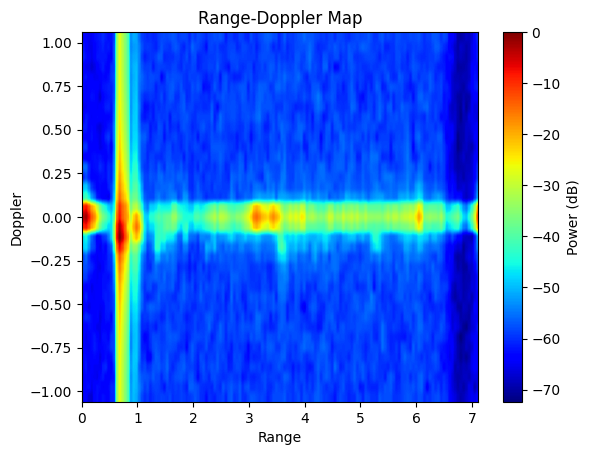

In [10]:
checking = range_doppler_map(session4_calibration[1], 100, True)